In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go

C:\Users\rajes\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
airbnb= pd.read_csv("AB_NYC_2019.csv")

In [3]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [4]:
import pandas_profiling

In [5]:
pandas_profiling.ProfileReport(airbnb)

In [6]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
airbnb.shape

(48895, 16)

In [8]:
airbnb.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [9]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [10]:
airbnb.drop(columns=['id','last_review', 'host_name'], inplace=True, axis=1)

In [11]:
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [12]:
airbnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
airbnb.fillna({'name': 'Not Mentioned'},inplace= True)
airbnb.fillna({'reviews_per_month':0}, inplace=True)

In [14]:
airbnb.isnull().sum()

name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

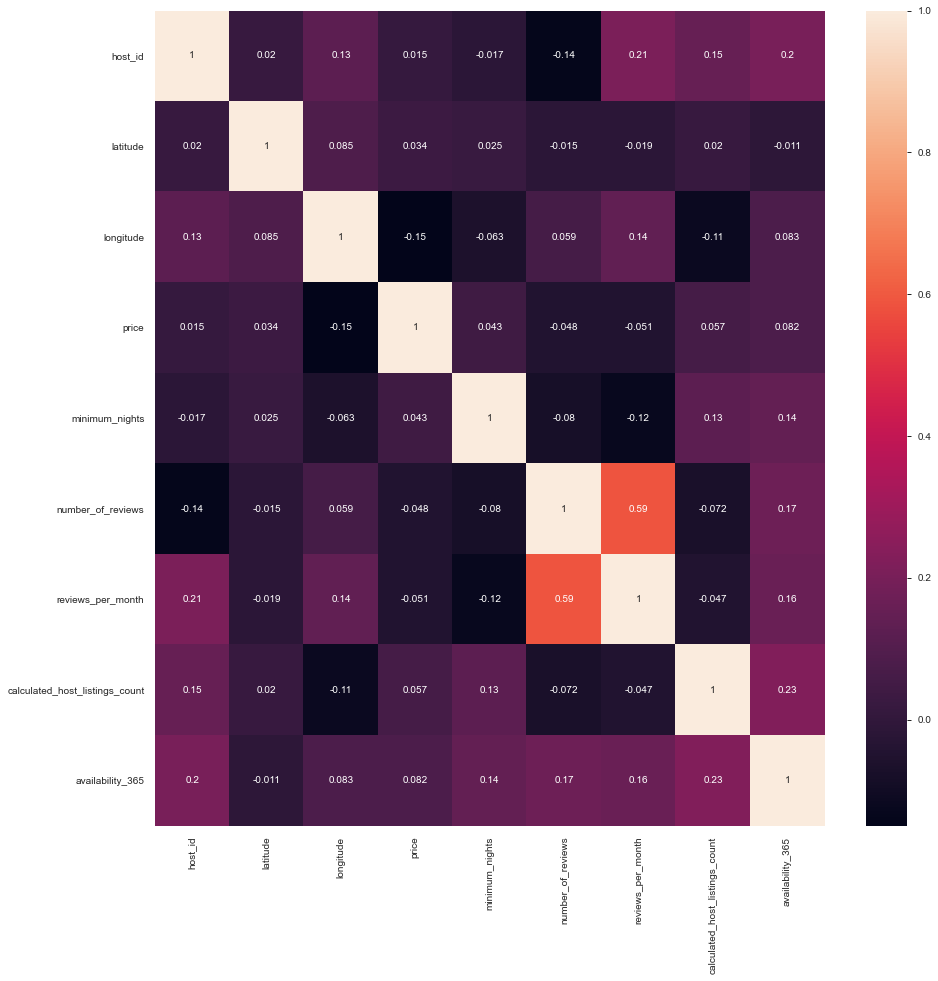

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(airbnb.corr(), annot=True)
plt.show()

In [16]:
airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

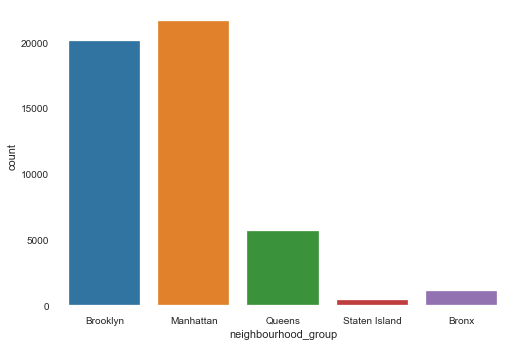

In [17]:
sns.countplot(x='neighbourhood_group', data=airbnb)

In [18]:
airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

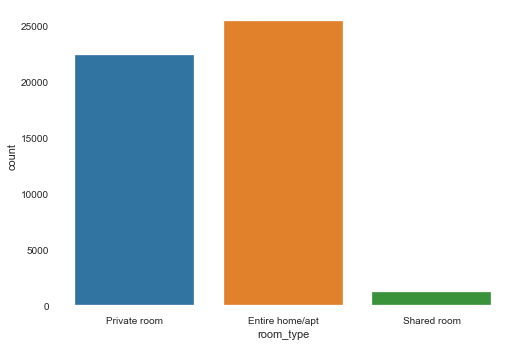

In [19]:
sns.countplot(x='room_type', data=airbnb)

In [20]:
print("Minimum Price: ", min(airbnb.price))
print("Maximum Price: ", max(airbnb.price))
print("Average price: ", np.mean(airbnb.price))

Minimum Price:  0
Maximum Price:  10000
Average price:  152.7206871868289


In [21]:
# No of listings a particular host has
print("Minimum number of listings a particular host has:", airbnb['calculated_host_listings_count'].min())
print("Maximum number of listings a particular host has:", airbnb['calculated_host_listings_count'].max())

Minimum number of listings a particular host has: 1
Maximum number of listings a particular host has: 327


In [22]:
# Let us take a look at the number of listings a host has on Airbnb
airbnb['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32], dtype=int64)

In [ ]:
# Visualizing the percentage of listings most host have
labels = airbnb['calculated_host_listings_count'].unique()
sizes = airbnb['calculated_host_listings_count'].value_counts()*100

px.pie(data_frame=airbnb,names=labels, hole=0.5,values=sizes, opacity=0.8, title='Listings a host has on Airbnb')
#plt.show()

In [ ]:
# Grouping based on neighbourhood
bronx = airbnb['neighbourhood_group'] == 'Bronx'
staten_island = airbnb['neighbourhood_group'] == 'Staten Island'
queens = airbnb['neighbourhood_group'] == 'Queens'
brooklyn = airbnb['neighbourhood_group'] == 'Brooklyn'
manhattan = airbnb['neighbourhood_group'] == 'Manhattan'

# Calculating the avergae price in each neighbourhood
bronx_avg = airbnb[bronx]['price'].mean()
statenisland_avg = airbnb[staten_island]['price'].mean()
queens_avg = airbnb[queens]['price'].mean()
brooklyn_avg = airbnb[brooklyn]['price'].mean()
manhattan_avg = airbnb[manhattan]['price'].mean()


print("--- Average Price in the Neighbourhood Group ---")
print("Bronx:",bronx_avg)
print("Staten Island:",statenisland_avg)
print("Quuens:", queens_avg)
print("Brooklyn:",brooklyn_avg)
print("Manhattan:",manhattan_avg)

In [ ]:
# Grouping based on room types
private_room = airbnb['room_type'] == 'Private room'
entire_home = airbnb['room_type'] == 'Entire home/apt'
shared_room = airbnb['room_type'] == 'Shared room'

# Calculating the avergae price in each neighbourhood
private_avg = airbnb[private_room]['price'].mean()
entire_avg = airbnb[entire_home]['price'].mean()
shared_avg = airbnb[shared_room]['price'].mean()


print("--- Average Price of the Room Types ---")
print("Private Room:",private_avg)
print("Entire Home/Apt:",entire_avg)
print("Shared room:", shared_avg)

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
airbnb_brooklyn=airbnb[airbnb['neighbourhood_group']=='Brooklyn']
word_cloud=WordCloud(width=1000,
                    height=800,
                    colormap='GnBu',
                    max_font_size=120,
                    min_font_size=15,
                    min_word_length=4,
                     background_color='white',
                     margin=0,
                    max_words=200).generate(" ".join(airbnb_brooklyn['name']))

plt.figure(figsize=(10,15))
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis('off')
plt.show()

In [ ]:
airbnb_brooklyn=airbnb[airbnb['neighbourhood_group']=='Manhattan']
word_cloud=WordCloud(width=1000,
                    height=800,
                    colormap='twilight_shifted',
                    max_font_size=120,
                    min_font_size=15,
                    min_word_length=4,
                     background_color='white',
                     margin=0,
                    max_words=200).generate(" ".join(airbnb_brooklyn['name']))

plt.figure(figsize=(10,15))
plt.imshow(word_cloud, interpolation='gaussian')
plt.axis('off')
plt.show()